In [ ]:
pip install matplotlib seaborn plotly

Missing values in Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate transactions: 0
Duplicate customers: 0
Duplicate products: 0


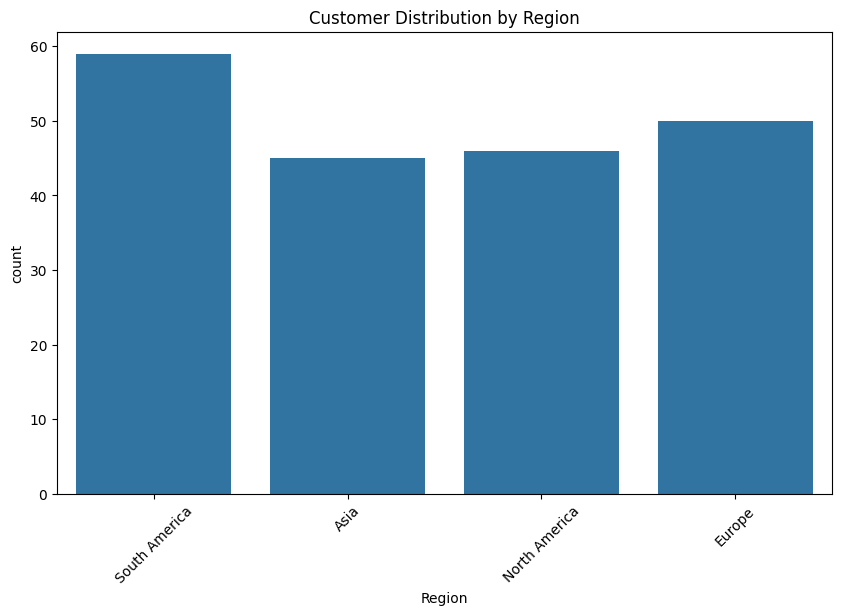

<ipython-input-3-c4b5e5361886>:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_signups = customers_df.resample('M', on='SignupDate').size()


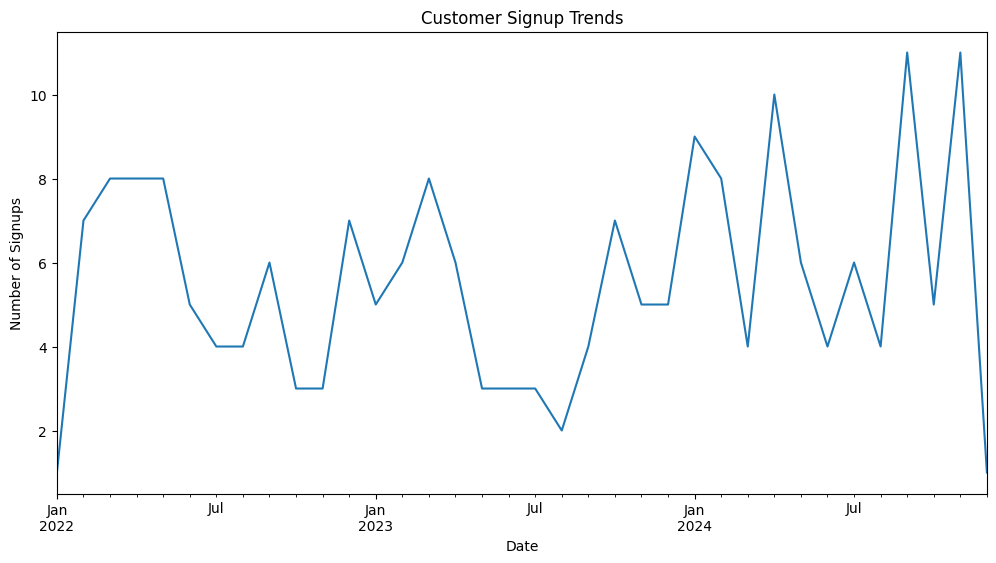

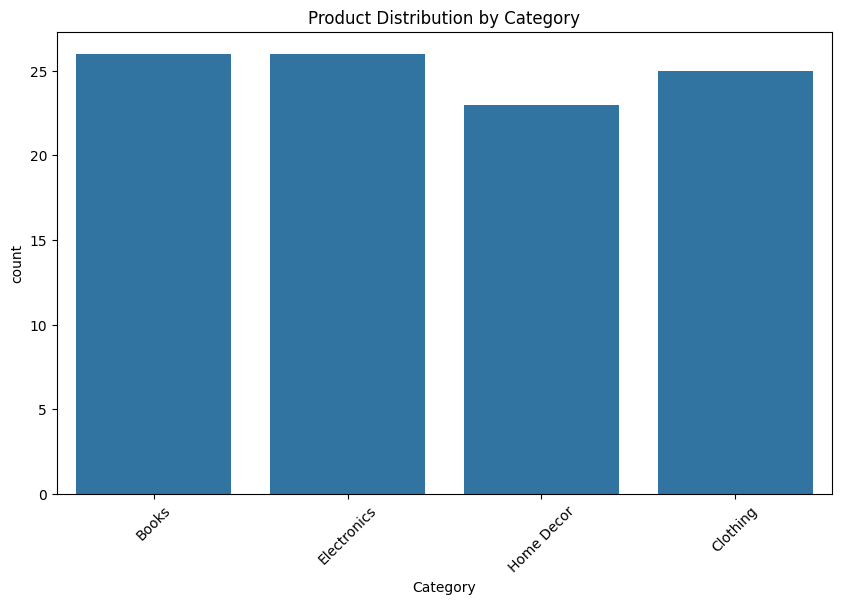

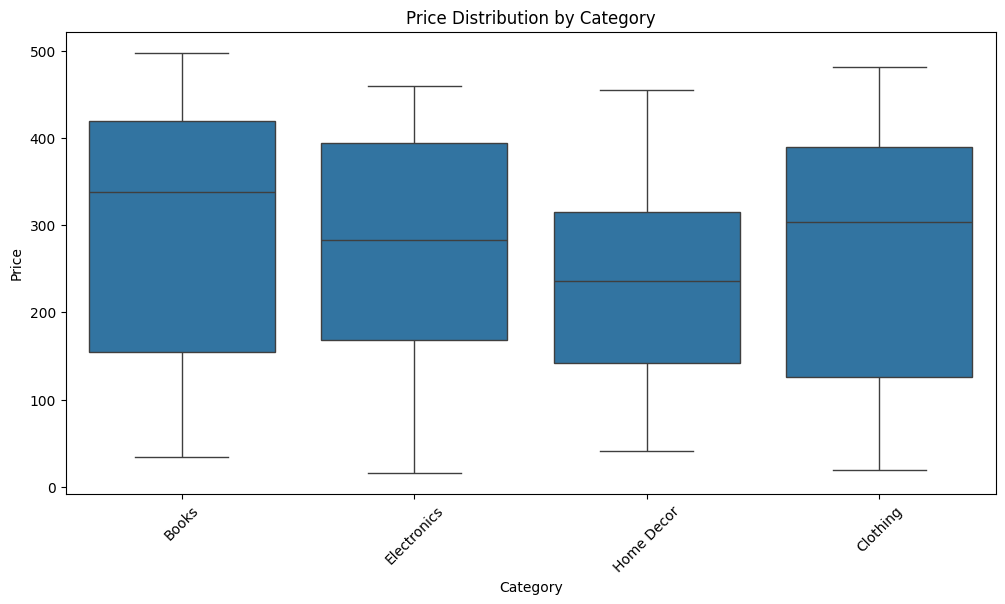

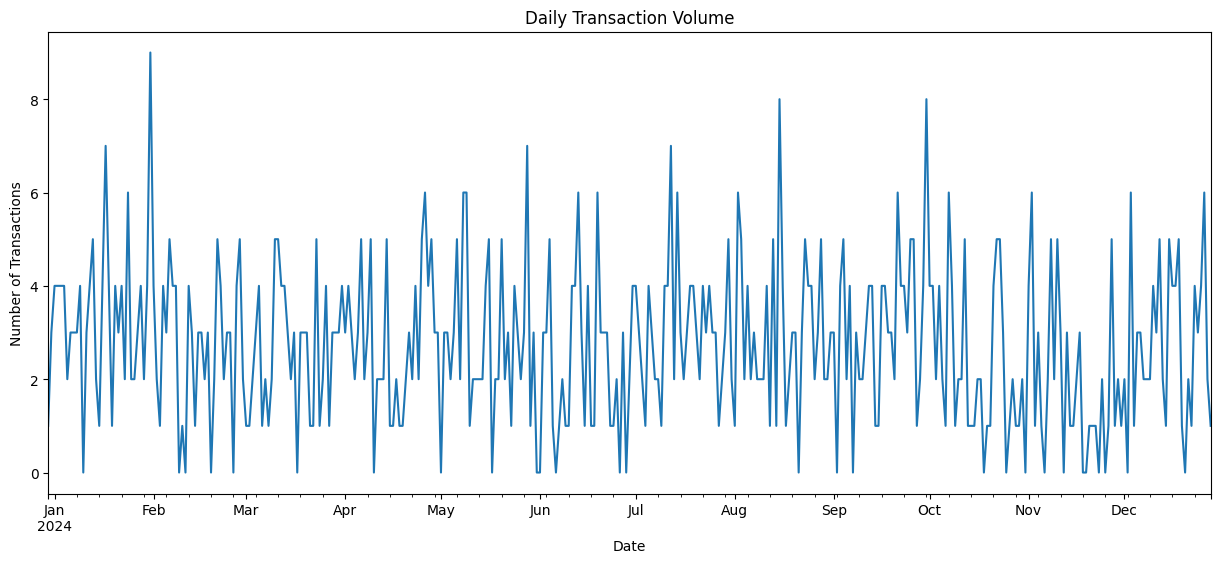

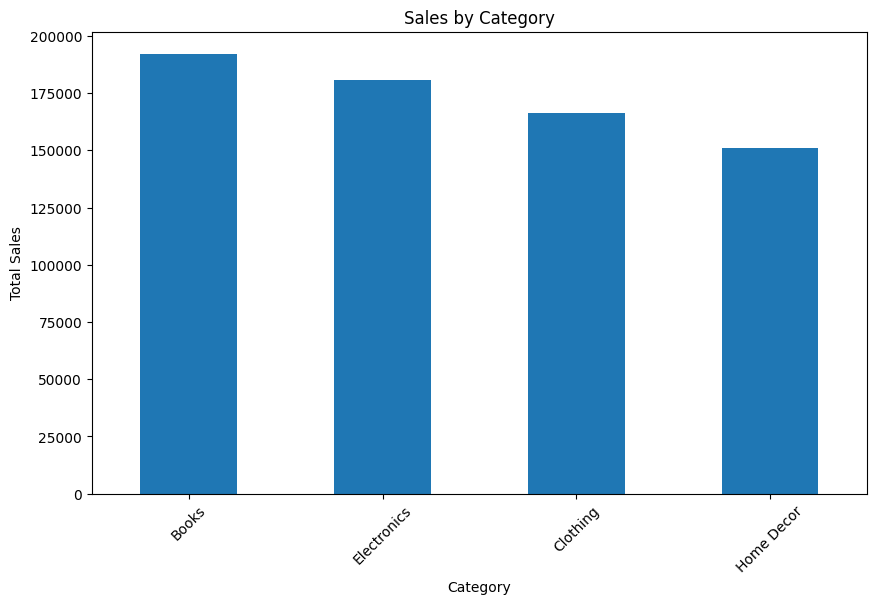

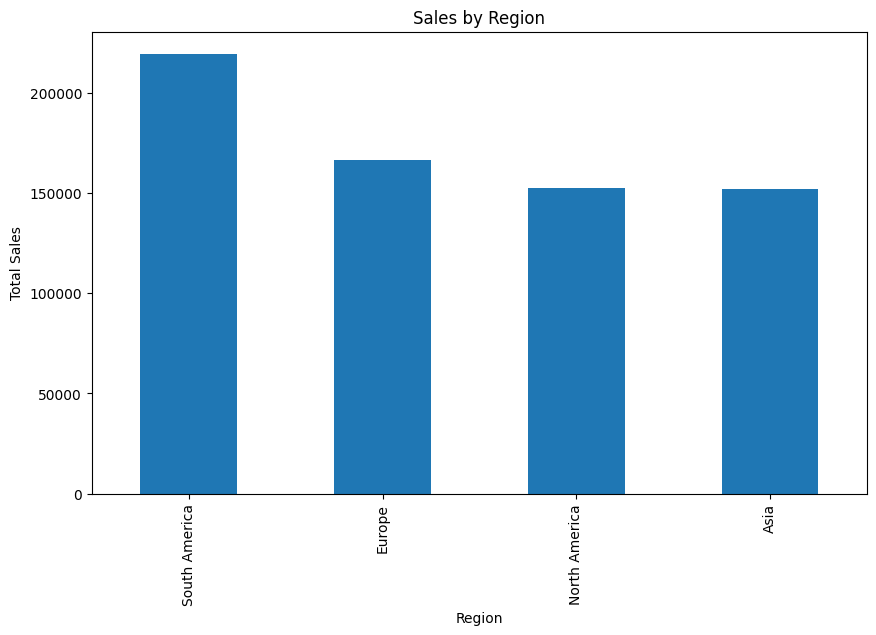

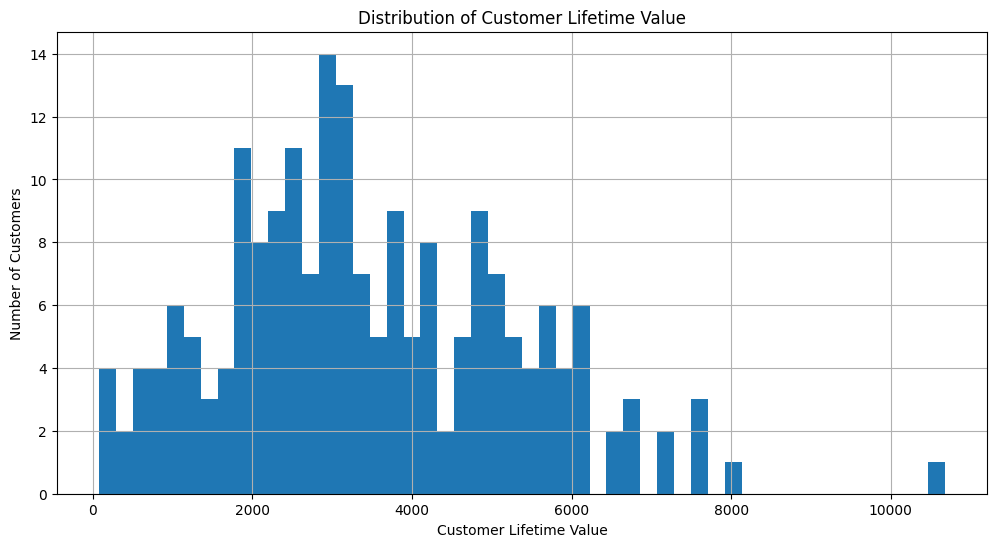


Business Insights:
1. Customer Geographic Distribution:
2. Product Category Performance:
3. Customer Lifetime Value Patterns:
4. Seasonal Transaction Trends:
5. Regional Sales Performance:


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

# Load the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Data Cleaning and Preprocessing
def clean_and_preprocess():
    # Convert date columns to datetime
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

    # Check for missing values
    print("Missing values in Customers:", customers_df.isnull().sum())
    print("Missing values in Products:", products_df.isnull().sum())
    print("Missing values in Transactions:", transactions_df.isnull().sum())

    # Check for duplicates
    print("\nDuplicate transactions:", transactions_df.duplicated().sum())
    print("Duplicate customers:", customers_df.duplicated().sum())
    print("Duplicate products:", products_df.duplicated().sum())

# Customer Analysis
def analyze_customers():
    # Customer distribution by region
    plt.figure(figsize=(10, 6))
    sns.countplot(data=customers_df, x='Region')
    plt.title('Customer Distribution by Region')
    plt.xticks(rotation=45)
    plt.show()

    # Customer signup trends
    monthly_signups = customers_df.resample('M', on='SignupDate').size()
    plt.figure(figsize=(12, 6))
    monthly_signups.plot()
    plt.title('Customer Signup Trends')
    plt.xlabel('Date')
    plt.ylabel('Number of Signups')
    plt.show()

# Product Analysis
def analyze_products():
    # Product category distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=products_df, x='Category')
    plt.title('Product Distribution by Category')
    plt.xticks(rotation=45)
    plt.show()

    # Price distribution by category
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=products_df, x='Category', y='Price')
    plt.title('Price Distribution by Category')
    plt.xticks(rotation=45)
    plt.show()

# Transaction Analysis
def analyze_transactions():
    # Merge transactions with customer and product data
    merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

    # Transaction trends over time
    daily_transactions = merged_df.resample('D', on='TransactionDate').size()
    plt.figure(figsize=(15, 6))
    daily_transactions.plot()
    plt.title('Daily Transaction Volume')
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.show()

    # Sales by category
    category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    category_sales.plot(kind='bar')
    plt.title('Sales by Category')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.show()

# Regional Analysis
def analyze_regional_performance():
    merged_df = transactions_df.merge(customers_df, on='CustomerID')

    # Sales by region
    regional_sales = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    regional_sales.plot(kind='bar')
    plt.title('Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Sales')
    plt.show()

# Customer Value Analysis
def analyze_customer_value():
    # Calculate customer lifetime value
    customer_value = transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    customer_value.hist(bins=50)
    plt.title('Distribution of Customer Lifetime Value')
    plt.xlabel('Customer Lifetime Value')
    plt.ylabel('Number of Customers')
    plt.show()

# Execute analyses
if __name__ == "__main__":
    clean_and_preprocess()
    analyze_customers()
    analyze_products()
    analyze_transactions()
    analyze_regional_performance()
    analyze_customer_value()

    # Generate Business Insights
    print("\nBusiness Insights:")
    # You'll need to fill these based on the actual analysis results
    insights = [
        "1. Customer Geographic Distribution:",
        "2. Product Category Performance:",
        "3. Customer Lifetime Value Patterns:",
        "4. Seasonal Transaction Trends:",
        "5. Regional Sales Performance:"
    ]
    for insight in insights:
        print(insight)